In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import PIL
import skimage
% matplotlib inline

In [3]:
train='/content/drive/MyDrive/gaze_dataset/train'

In [4]:
classes=['Centerstack','Forward','Left_wing_mirror','Rearview_mirror','Right_wing_mirror']

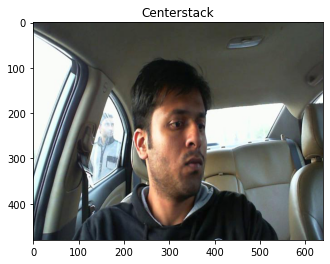

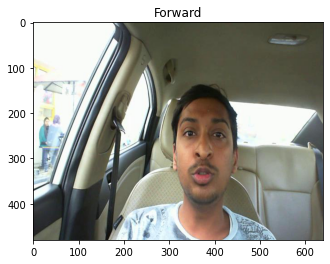

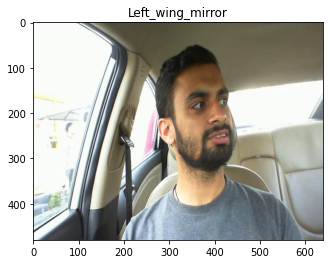

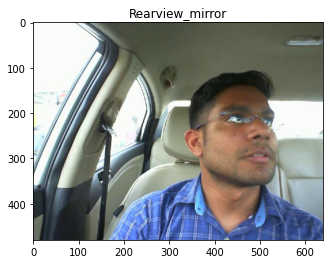

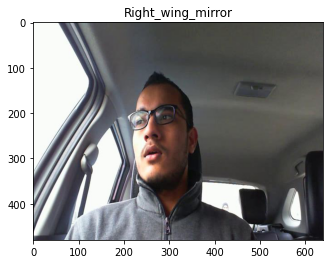

In [5]:
for i in range(5):
  path = os.path.join(train,classes[i],'*')
  path = glob.glob(path)
  image = io.imread(path[4])  

  # plotting the original image
  fig, ax = plt.subplots()
  ax.set_title(classes[i])
  fig.set_figwidth(20)
  ax.imshow(image)

In [ ]:
# import tensorflow as tf

# from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt

In [ ]:
#from __future__ import print_function
# import keras
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
# from keras.layers import Conv2D, MaxPooling2D
# from keras.preprocessing.image import ImageDataGenerator
# import os

In [ ]:
num_classes = 5
img_rows, img_cols = 48, 48
batch_size = 32

train_data_dir = '/content/drive/MyDrive/gaze_dataset/train'
validation_data_dir = '/content/drive/MyDrive/gaze_dataset/train'


train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=30,
      #shear_range=0.3,
      zoom_range=0.5,
      width_shift_range=0.4,
      height_shift_range=0.4,
      #horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

In [ ]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
#                  input_shape = (img_rows, img_cols, 1)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
#                  input_shape = (img_rows, img_cols, 1)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(64, kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Dense(num_classes, kernel_initializer="he_normal"))
# model.add(Activation("softmax"))

# print(model.summary())

In [ ]:
import numpy as np
import keras
import os
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import model_from_json
import keras.applications
import itertools
import cv2
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline



In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [ ]:

num_classes = 5
resnet_weights_path = 'imagenet'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

F1_Score_calculation


In [ ]:
def f1_score(y_true, y_pred): 
 true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
 possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
 predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
 precision = true_positives / (predicted_positives + K.epsilon())
 recall = true_positives / (possible_positives + K.epsilon())
 f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
 return f1_val

In [ ]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=[f1_score])

In [ ]:

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/gaze_dataset/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/gaze_dataset/train',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,verbose=1,
        steps_per_epoch=10,
        validation_data=validation_generator,
        validation_steps=1)

In [ ]:
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = Adam(lr=0.001),
#               metrics = [f1_score])

# nb_train_samples = 2500
# nb_validation_samples = 2500
# epochs = 10

# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch = nb_train_samples // batch_size,
#     epochs = epochs,
    
#     validation_data = validation_generator,
#     validation_steps = nb_validation_samples // batch_size)

CAFEE MODEL For Extracting Face 

In [ ]:
import numpy as np
import cv2
import argparse
import os

In [ ]:
os.chdir("/content/drive/MyDrive/gaze_dataset/train/New_dataset")

In [ ]:
lists = ['Centerstack','Forward','Left_wing_mirror','Rearview_mirror','Right_wing_mirror']

In [ ]:
for item in lists:
  os.mkdir(item)

In [ ]:
root = "/content/drive/MyDrive/gaze_dataset/train/Centerstack"

In [ ]:
psth = os.path.join(root,'*')

In [ ]:
train_root = "/content/drive/MyDrive/gaze_dataset/train"

for i in classes:
  pt = os.path.join(train_root,'New_dataset',i)
  os.chdir(pt)
  print(pt)

  path = os.path.join(train_root,i,'*')
  path = glob.glob(path)

  
  for ip in path:
    fN = ip.split("/")[-1]

    modelFile = "/content/drive/MyDrive/res_ssd_300Dim.caffeModel"
    configFile = "/content/drive/MyDrive/configuration file.txt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
    img = cv2.imread(ip)
    h, w = img.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
    net.setInput(blob)
    faces = net.forward()
    #to draw faces on image
    for i in range(faces.shape[2]):
            confidence = faces[0, 0, i, 2]
            if confidence > 0.5:
                box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
                (x, y, x1, y1) = box.astype("int")
                cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
                roi_color = img[y:y1, x:x1]

    cv2.imwrite(fN+'_face.jpg', roi_color)

In [ ]:
len(os.listdir("/content/drive/MyDrive/gaze_dataset/train/New_dataset/Right_wing_mirror"))

In [ ]:
num_classes = 5
img_rows, img_cols = 256, 256
batch_size = 32

train_data_dir = '/content/drive/MyDrive/gaze_dataset/train/New_dataset'
# validation_data_dir = '/content/drive/MyDrive/gaze_dataset/train/New_dataset'


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      #rotation_range=30,
      #shear_range=0.3,
      zoom_range=0.5,
      width_shift_range=0.4,
      height_shift_range=0.4,
      #horizontal_flip=True,
      # fill_mode='nearest',
      validation_split = 0.2)

# validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        # color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='sparse',
        # shuffle=True,
        subset = 'training')

validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        # color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='sparse',
        #shuffle=True
        subset = 'validation')

In [ ]:
base_model = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(224, 224,3))
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit_generator(
    train_generator, 
    validation_data = validation_generator,
    epochs = 10,
    steps_per_epoch = train_generator.samples,
    validation_steps= validation_generator.samples)

VGG Model

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
vgg = VGG19(input_shape=(256,256,3), weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(5, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
model.fit(train_generator, 
    validation_data = validation_generator,
    epochs = 10,
    steps_per_epoch = train_generator.samples//batch_size,
    validation_steps= validation_generator.samples//batch_size
  )

In [6]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [36]:
train_dir ='/content/drive/MyDrive/gaze_dataset/New_dataset'
BATCH_SIZE = 32
# IMG_SIZE = (256, 256, 3)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            )
# test_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
  
#   batch_size=8)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=8)



# normalization_layer = tf.keras.layers.Rescaling(1./255)
# normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))

# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 5

model = tf.keras.Sequential([
  
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout((0.2)),
  tf.keras.layers.BatchNormalization(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(num_classes,activation = 'softmax')
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_dataset,
  validation_data=val_ds,
  epochs=25
)

Found 2476 files belonging to 5 classes.
Found 2476 files belonging to 5 classes.
Using 495 files for validation.
Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


78/78 [==============================] - 19s 225ms/step - loss: 71.9645 - accuracy: 0.5174 - val_loss: 74.4882 - val_accuracy: 0.3414
Epoch 2/25
78/78 [==============================] - 18s 224ms/step - loss: 40.7861 - accuracy: 0.6781 - val_loss: 21.9167 - val_accuracy: 0.6889
Epoch 3/25
78/78 [==============================] - 18s 221ms/step - loss: 32.9619 - accuracy: 0.7488 - val_loss: 31.2324 - val_accuracy: 0.6626
Epoch 4/25
78/78 [==============================] - 18s 221ms/step - loss: 31.9156 - accuracy: 0.7662 - val_loss: 14.6202 - val_accuracy: 0.8202
Epoch 5/25
78/78 [==============================] - 18s 223ms/step - loss: 21.7548 - accuracy: 0.8162 - val_loss: 24.1706 - val_accuracy: 0.7616
Epoch 6/25
78/78 [==============================] - 19s 229ms/step - loss: 19.3008 - accuracy: 0.8364 - val_loss: 14.2216 - val_accuracy: 0.8444
Epoch 7/25
78/78 [==============================] - 20s 242ms/step - loss: 17.3261 - accuracy: 0.8635 - val_loss: 22.1672 - val_accuracy: 0.8

# prediction for test images

In [37]:
test_dir = "/content/drive/MyDrive/gaze_dataset/test"

In [ ]:
test_dir = "/content/drive/MyDrive/gaze_dataset/test"
os.chdir("/content/drive/MyDrive/gaze_dataset/test_new_datset")


path = os.path.join(test_dir,'*')
path = glob.glob(path)


for ip in path:
  fN = ip.split("/")[-1]

  modelFile = "/content/drive/MyDrive/res_ssd_300Dim.caffeModel"
  configFile = "/content/drive/MyDrive/configuration file.txt"
  net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
  img = cv2.imread(ip)
  h, w = img.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
  net.setInput(blob)
  faces = net.forward()
  #to draw faces on image
  for i in range(faces.shape[2]):
          confidence = faces[0, 0, i, 2]
          if confidence > 0.5:
              box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
              (x, y, x1, y1) = box.astype("int")
              cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
              roi_color = img[y:y1, x:x1]

  cv2.imwrite(fN, roi_color)

In [38]:
test = "/content/drive/MyDrive/gaze_dataset/test"

dictiory = {}
dictiory['filename'] = []
dictiory['class'] = []

for i in os.listdir(test):
  ip = os.path.join(test,i)

  image_path = ip
  image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
  inarr = tf.keras.preprocessing.image.img_to_array(image)
  inarr = np.array([inarr])  # Convert single image to a batch.
  predictions = model.predict(inarr)

  dictiory['filename'].append(i)
  res = np.argmax(predictions,axis = 1)[0]
  if(res == 4):
    dictiory['class'].append("Right_wing_mirror")
  elif(res == 3):
    dictiory['class'].append("Rearview_mirror")
  elif(res == 2):
    dictiory['class'].append("Left_wing_mirror")
  elif(res == 1):
    dictiory['class'].append("Forward")
  else:
    dictiory['class'].append("Centerstack")

In [39]:
dataframe = pd.DataFrame.from_dict(dictiory)

In [40]:
dataframe.to_csv("OutputM.csv", index = False)


In [41]:
% pwd

'/content/drive/MyDrive/gaze_dataset/test_new_datset'